<a href="https://colab.research.google.com/github/Akasxh/AI-LAB/blob/main/Assignment_AI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# To download the dataset
!pip install ucimlrepo

In [4]:
# Using these for dat manupulation, heatmap -sns , for plotting using matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Taken from website from the link below:
# https://archive.ics.uci.edu/dataset/53/iris
from ucimlrepo import fetch_ucirepo

# fetch dataset
# iris is where you have the dataset so while making the datafram use: iris.data.features as below in X and Y
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [6]:
# uncomeent any one of the below
df = pd.DataFrame(data=X)
#df = pd.DataFrame(data=iris.data.features)

In [7]:
# To see the dataframe you can use .head() as well
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# Adding a column 'target' its the same as Y that we took while importing this dataset
df['target'] = iris.data.targets

In [9]:
# To see change in dataframe after having 'target' column
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


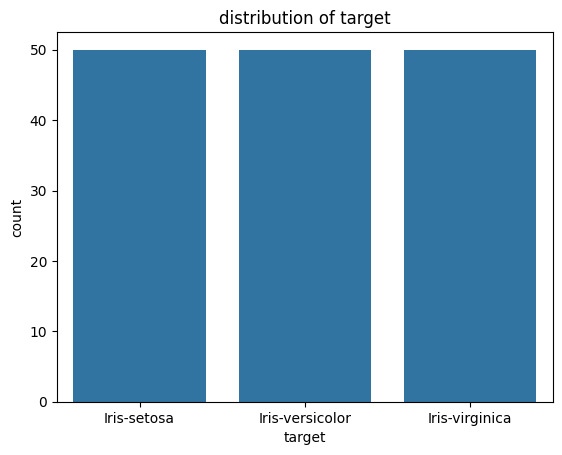

In [10]:
# Lets see the distribution of data in Y or 'target'
sns.countplot(x='target', data=df)
plt.title('distribution of target')
plt.show()

In [11]:
# lets see the distribution from above in numerical form of various var in 'target'
class_distribution = df['target'].value_counts()
print(class_distribution)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64


In [12]:
# To count and see for missin values
df.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [13]:
# now lets see if the dataframe has null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# If there is any null value it will return the sum of thhe respective columns
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [15]:
# To get a basic idea of the values in dataframe
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-16-5fc63adbc12c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


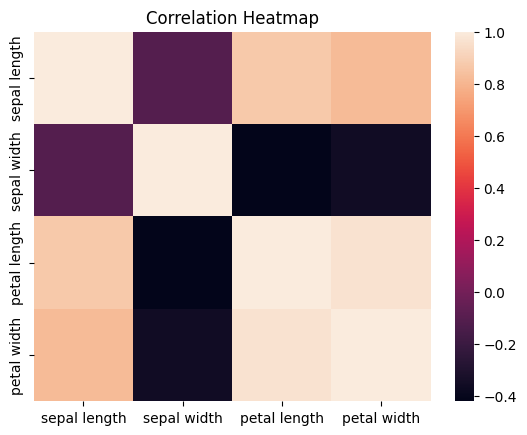

In [16]:
# Heat map just as done in previous lab. Using sns as we imported sns from seaborn
# This df doesnt have many columns hence not a very useful heatmap
# below is the corelation matrix
plt.title('Correlation Heatmap')
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()